In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Homework 2

Problem 1) (10 pts) Using the code for the two-stage RK scheme provided in the notes, implement the 4-stage RK scheme using the method described in the textbook. (5pts)  Test your method on the problem

$$
\dot{x} = x(1-x), ~ x(0) = \frac{1}{2}.
$$

Do you get an error that goes like $(\delta t)^{4}$? (5pts)  Note, to answer this, pick a reference time, like $t_{f}=2$.  Derive an exact solution, $x(t)$, and then compare $x(t_{f})$ to $x^{(RK)}(t_{f})$ where $x^{(RF)}(t_{f})$ is the approximation generated by the RK scheme.  If our theory is correct, then we should have 

$$
\left|x(t_{f}) -  x^{(RK)}(t_{f})\right| \approx C (\delta t)^4
$$

or 

$$
\log_{10}\left|x(t_{f}) -  x^{(RK)}(t_{f})\right| \approx \log_{10}C  + 4 \log_{10}(\delta t)
$$

so that if we made an array of $\delta t$ values, like 

`
dtvals = np.array([1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4])
`

and then ran the RK scheme over each time step and kept track of the error in an array, and then plotted the array against the `dtvals` on a log/log plot, we should see a line of slope 4 appear.  See also problem 2.8.3/2.8.4 for further reference.  

**Solution**


Following the RK2 scheme provided in class, we implement the RK4

In [18]:
def f(x,t):
    return x*(1.-x)

def rk4(f,xj,tj,dt):
    k1 = f(xj,tj)
    k2 = f(xj+dt*k1/2,tj+dt/2)
    k3 = f(xj+dt*k2/2,tj+dt/2)
    k4 = f(xj+dt*k3,tj+dt)
    return xj + (dt/6)*(k1+2*k2+2*k3+k4)

def ode_solver(f,x0,tf,dt):
    # This program solves the ode dx/dt = f(x,t) for x(0) = x0
    # for 0<= t <= tf with time step dt.  
    
    nstep = int(np.round(tf/dt))
    sol = np.zeros(nstep)
    tvals = np.zeros(nstep)
    sol[0] = x0
    for jj in xrange(1,nstep):
        tj = (jj-1)*dt
        sol[jj] = rk4(f,sol[jj-1],tj,dt)
        tvals[jj] = tj+dt
    plt.plot(tvals,sol,color='k',ls='-')
    plt.xlabel('$t$')
    plt.ylabel('$x(t)$')

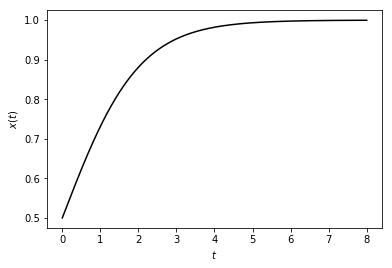

In [19]:
ode_solver(f,.5,8.,1e-4)

Now we plot the analytical solution and the numerical solution together to see how well our RK4 method does.

In [11]:
def fep(x,t):
    return x*(1.-x)

def rk4(f,xj,tj,dt):
    k1 = f(xj,tj)
    k2 = f(xj+dt*k1/2,tj+dt/2)
    k3 = f(xj+dt*k2/2,tj+dt/2)
    k4 = f(xj+dt*k3,tj+dt)
    return xj + (dt/6)*(k1+2*k2+2*k3+k4)

def xsol(xi,t):
    e = np.exp(t)
    return e/(1+e)

def ode_solver(f,x0,tf,dt):
    # This program solves the ode dx/dt = f(x,t) for x(0) = x0
    # for 0<= t <= tf with time step dt.  
    
    nstep = int(np.round(tf/dt))
    numsol = np.zeros(nstep)
    anasol = np.zeros(nstep)
    tvals = np.zeros(nstep)
    numsol[0] = x0
    anasol[0] = x0
    for jj in xrange(1,nstep):
        tj = (jj-1)*dt
        numsol[jj] = rk4(f,numsol[jj-1],tj,dt)
        tvals[jj] = tj+dt
        anasol[jj] = xsol(x0,tvals[jj])
        
    plt.plot(tvals,numsol,color='k',ls='-',label='Numerics')
    plt.plot(tvals,anasol,color='r',ls='--',label='Analytical')
    
    plt.xlabel('$t$')
    plt.ylabel('$x(t)$')
    plt.legend(loc=(.65,.1))

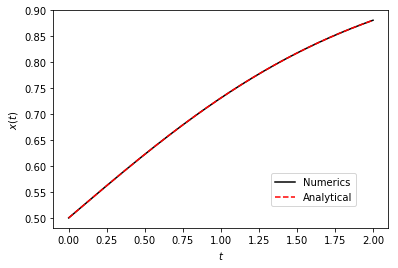

In [12]:
ode_solver(fep,.5,2.,1e-4)

Well, the solutions basically overlap, so the RK4 seems to be making a great job. What is left to do is to verify if we get an error that goes like $(\delta t)^{4}$. The following code will try to enlighten us 

In [31]:
def xact_sol(x0,t):
    e = np.exp(t)
    return e/(1+e)

def xnum_sol(f,x0,tf,dt):
    nstep = int(np.round(tf/dt))
    tvals = np.zeros(nstep)
    sol = np.zeros(nstep)
    sol[0]= x0
    
    for jj in range(1,nstep):
        tj=(jj-1)*dt
        sol[jj]=rk4(f,sol[jj-1],tj,dt)
        tvals[jj] = tj+dt
    return sol[-1]

def ode_solver_np(f,x0,tf,dt):
    
    nstep = int(np.round(tf/dt))
    numsol = np.zeros(nstep)
    anasol = np.zeros(nstep)
    tvals = np.zeros(nstep)
    numsol[0] = x0
    anasol[0] = x0
    
    nstep = int(np.round(tf/dt))
    numsol = np.zeros(nstep)
    anasol = np.zeros(nstep)
    tvals = np.zeros(nstep)
    numsol[0] = x0
    anasol[0] = x0
    for jj in xrange(1,nstep):
        tj = (jj-1)*dt
        numsol[jj] = rk4(f,numsol[jj-1],tj,dt)
        tvals[jj] = tj+dt
        anasol[jj] = xsol(x0,tvals[jj])
    return [[numsol[-1]],[anasol[-1]]]

In [32]:
def dt4(f,x0,tf):
    dtvals = np.array([1e-1,5e-2,1e-2,5e-3,1e-3,5e-4,1e-4])
    
    err = np.zeros(dtvals.size)
    
    for jj in range(1,8):
        dt = dtvals[jj-1]
        num = np.asarray(ode_solver_np(f,x0,tf,dt)) 
        
        err[jj-1] = np.abs(num[0]-num[1])
    slope, intercept = np.polyfit(np.log(dtvals)[:-2], np.log(err)[:-2], 1)
    print(slope)
    plt1 = plt.figure()
    plt.loglog(dtvals[:-2], err[:-2], basex=10,color='b')
    plt.grid(True)
    return err

3.75847281105


/usr/local/conda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


array([  4.18279520e-08,   2.62419264e-09,   4.20097290e-12,
         2.62567745e-13,   1.55431223e-15,   0.00000000e+00,
         0.00000000e+00])

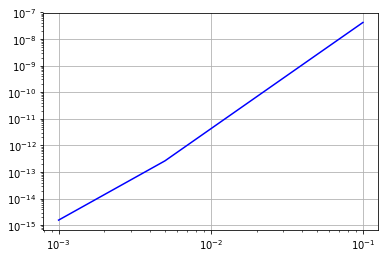

In [33]:
dt4(f,.5,2)

In the end we get a line of slope $\approx3.8$, therefore it is not too unreasonable to assume our error in fact goes like $(\delta t)^{4}$. There were probably imprecisions made in the code and it was necessary to truncate some error values.

Problem 2) (5 pts) 2.3.2.  Also, using the non-dimensionalizations 

$$
x = x_{s}\tilde{x}, ~ \tau = \frac{t}{t_{s}},
$$

find a non-dimensionalization which removes all free parameters from the equation.  What does your non-dimensionalization tell you about the scales within the dynamics?

**Solution**

**Part a)**

We have a chemical reaction described by the following ODE

$$
\dot x = k_{1}ax - k_{-1}x^{2},
$$

where $x$ is the concentration of the reagent $X$, $a$ is the concentration of the reagent $A$ (which we are told to treat as a constant) and $k_{1}$ and $k_{-1}$ (both positive, of course) are the kinetic constants of the direct and inverse reaction, respectively.

To find the fixed point, we need to solve

$$
f(x) = 0,
$$

where $f(x)$ is our given ODE. Thus, we readily find two fixed points

$$
x(k_{1}a - k_{-1}x) = 0 \longrightarrow x_{\ast}=0, ~ x_{\ast} = \frac{k_{1}}{k_{-1}}a.
$$

To investigate their stability, we perform a local analysis by evaluating the derivative of $f(x)$ at the two fixed points. So

$$
f^{\prime}(x) = k_{1}a - 2k_{-1}x,
$$
 
at $x_{\ast} = 0$

$$
f^{\prime}(0) = k_{1}a > 0,
$$

as both $k_{1}$ and $a$ are greater than zero (a negative concentration would make no physical sense as would not a negative rate constant).

At $x_{\ast} = \frac{k_{1}}{k_{-1}}a$, we have

$$
f^{\prime}\left(\frac{k_{1}}{k_{-1}}a\right) = -k_{1}a < 0,
$$
since, as already pointed out above, both parameters are positive.

Therefore, in conclusion, we have that

$$
x_{\ast} = 0
$$

is un unstable fixed point, while

$$
x_{\ast} = \frac{k_{1}}{k_{-1}}a
$$

is a stable fixed point.

**Part b**

We plot $x(t)$ for different initial conditions using the Runge-Kutta fourth order method and picking some not unreasonable values for the constants.

In [9]:
kd=0.001
ki=0.001
a=100

def f(x,t):
    return kd*a*x - ki*x**2

def rk4(f,xj,tj,dt):
    k1 = f(xj,tj)
    k2 = f(xj+dt*k1/2,tj+dt/2)
    k3 = f(xj+dt*k2/2,tj+dt/2)
    k4 = f(xj+dt*k3,tj+dt)
    return xj + (dt/6)*(k1+2*k2+2*k3+k4)

tf=200
dt=1e-4
nstep = int(np.round(tf/dt))
sol = np.zeros(nstep)
tvals = np.zeros(nstep)

def ode_solver(f,x0): 
    sol[0] = x0
    for jj in xrange(1,nstep):
        tj = (jj-1)*dt
        sol[jj] = rk4(f,sol[jj-1],tj,dt)
        tvals[jj] = tj+dt
    plt.plot(tvals,sol,color='k',ls='-',label='x0')

def ode_solver1(f,x1):  
    sol[0] = x1
    for jj in xrange(1,nstep):
        tj = (jj-1)*dt
        sol[jj] = rk4(f,sol[jj-1],tj,dt)
        tvals[jj] = tj+dt
    plt.plot(tvals,sol,color='b',ls='-',label='x1')
    
def ode_solver2(f,x2): 
    sol[0] = x2
    for jj in xrange(1,nstep):
        tj = (jj-1)*dt
        sol[jj] = rk4(f,sol[jj-1],tj,dt)
        tvals[jj] = tj+dt
    plt.plot(tvals,sol,color='r',ls='-',label='x2')
    
def ode_solver3(f,x3): 
    sol[0] = x3
    for jj in xrange(1,nstep):
        tj = (jj-1)*dt
        sol[jj] = rk4(f,sol[jj-1],tj,dt)
        tvals[jj] = tj+dt
    plt.plot(tvals,sol,color='g',ls='-',label='x3')
    plt.xlabel('$t$')
    plt.ylabel('$x(t)$')
    plt.legend(loc=(.65,.1))
    plt.title('x(t) for different initial conditions')

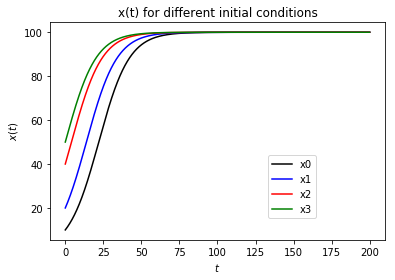

In [10]:
ode_solver(f,10)
ode_solver1(f,20)
ode_solver2(f,40)
ode_solver3(f,50)

Now using the non-dimensionalization

$$
x = x_{s}\tilde{x}, ~ \tau = \frac{t}{t_{s}},
$$

we try to find a non-dimensionalization which removes all free parameters from the equation.

So we have

$$
\frac{x_{s}}{t_{s}}\frac{d\tilde{x}}{d\tau} = k_{1}ax_{s}\tilde{x}-k_{-1}(x_{s}\tilde{x})^{2},
$$

which yields

$$
\frac{d\tilde{x}}{d\tau} = k_{1}at_{s}\tilde{x}-k_{-1}t_{s}x_{s}\tilde{x}^{2}.
$$

Let

$$
k_{1}at_{s} = 1 \longrightarrow t_{s} = \frac{1}{k_{1}a}.
$$

Therefore,

$$
k_{-1}x_{s} = k_{1}a \longrightarrow = \frac{x_{s}}{a} = \frac{k_{1}}{k_{-1}}.
$$

Thus, finally we have

$$
\frac{d\tilde{x}}{d\tau} = \tilde{x} - \tilde{x}^{2} \longrightarrow \frac{d\tilde{x}}{d\tau} = \tilde{x}(1-\tilde{x}).
$$

So, we notice that the characteristic time scale for the ODE is

$$
t_{s} = \frac{1}{k_{1}a},
$$

which means that the characteristic time scale for the species $x$ to undergo the reaction is inversely proportional to the kinetic constant of the direct reaction and also inversely proportial to the concentration of the reagent $A$. So, if the concentration of the species $A$ is increased, then the characteristic time scale of the reaction would decrease by a factor of $1/k_{1}a$. Also if the constant for the direct reaction increases, the characteristic time scale would decrease, as well.
However, we were told that for this model to be accurate, we need a surplus of $A$, so that we could treat its concentration as constant. Therefore, given that $k_{1}$ is constant for a given reaction (for given pressure and temperature), then our characteristic time scale cannot really change for the model in question.

Also, we see that

$$
\frac{x_{s}}{a} = \frac{k_{1}}{k_{-1}},
$$

so the ratio of the concentration of the two species is equal to the ratio of the constant for the direct reaction over the constant for the inverse reaction. This also implies that

$$
x_{s} = \frac{k_{1}}{k_{-1}}a,
$$

so the characteristic concentration of the species $x$ is directly proportional to the one of the species $a$ times a constant.

Problem 3) (5pts) 2.3.4.  Also, using the non-dimensionalizations 
$$
N = N_{s}\tilde{N}, ~ \tau = \frac{t}{t_{s}},
$$

find a non-dimensionalization which removes as many free parameters from the equation as possible.  What does your non-dimensionalization tell you about the scales within the dynamics?  You cannot remove all the parameters, though you should be able to get one parameter in terms of all three.  What does this one parameter tell you about the dynamics in the problem?  

**Solution**

**Part a**
We are told that the effect growth rate for the population $N$ of certain species of organisms, expressed as $\frac{\dot N}{N}$, is highest at intermediate N. This is called the (strong) Allee effect.
We have to show that

$$
\frac{\dot N}{N} = r-a(N-b)^{2}
$$

provides an example of Allee effect.

For simplicity in the notation, let us call the above function $h(N)$. So, if $h(N)$ provides an example of Allee effect, then it is increasing before reaching a certain maximum (our intermediate N) and then decreasing afterwards, until it is zero at the carrying capacity $K$. So we have $h(N)$ increasing for

$$
0<N\leq\tilde{N}
$$

and $h(N)$ decreasing for 

$$
\tilde{N}\leq N \leq K,
$$

where $\tilde{N}$ is the intermediate value of $N$ which maximizes the effective growth rate.

The above statements imply that

$$
h^{\prime}(N)>0, ~ for ~ 0<N<\tilde{N}
$$

and
$$
h^{\prime}(N)<0, ~ for ~ \tilde{N}\leq N \leq K.
$$

Now, we will proceed in finding the fixed points of

$$
\frac{\dot N}{N} = r-a(N-b)^{2}=f(N)
$$

So

$$
rN-aN(N-b)^{2}=f(N)=0,
$$

which yields
$$
-a(N-b)^{2}=-r \longrightarrow N_{\ast}=0, ~ N_{\ast}=\pm\sqrt{\frac{r}{a}}+b
$$

So we have three fixed points. To study their stability, we look for values of $N$ for which $f(N)$ is greater than zero and for which it is less than zero. Thus

$$
rN-aN(N-b)^{2} > 0
$$

Let us consider both the cases when $-\sqrt{\frac{r}{a}}+b>0$ and $-\sqrt{\frac{r}{a}}+b<0$. So

For $-\sqrt{\frac{r}{a}}+b<0<N, ~ f(N)>0$,

For $0<N<-\sqrt{\frac{r}{a}}+b, ~ f(N)<0$,

For $-\sqrt{\frac{r}{a}}<0<\sqrt{\frac{r}{a}}+b, ~ f(N)>0$,

For $N>\sqrt{\frac{r}{a}}+b, ~ f(N)<0$.

So we see that $0$ and $\sqrt{\frac{r}{a}}+b$ are both stable fixed points, while $-\sqrt{\frac{r}{a}}+b$ is unstable. Thus, since

$$
rN-aN(N-b)^{2} > 0
$$

holds for

$$
-\sqrt{\frac{r}{a}}+b < N < \sqrt{\frac{r}{a}}+b,
$$

then the $f(N)$ must be greatest for intermediate values of $N$. As negative populations do not make any physical sense, we impose

$$
-\sqrt{\frac{r}{a}}+b > 0 \longrightarrow \frac{r}{a}<b^{2}\longrightarrow r<ab^{2}
$$

So that is a constraint on the possible values for $r$.Obviously, $r$ and $a$ have both to have the same sign, otherwise we would have a complex fixed point which would not make sense. Also, from our previous fixed point analysis, they both have to be positive. Also, $b$ must be greater than zero as well for the inequility to hold.

**Part b**

As we have already discussed the stability of our points, we plot our results, using the constraints found in the previous part.

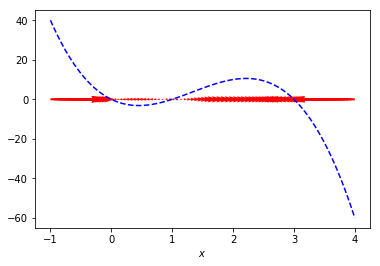

In [12]:
a=5
b=2
r=5
xvals = np.linspace(-1,4,90)
yvals = np.zeros(xvals.size)
xprime = r*xvals-a*xvals*(xvals-b)**2
yprime = np.zeros(xvals.size)
plt.plot(xvals,r*xvals-a*xvals*(xvals-b)**2,ls='--',color='b')
plt.quiver(xvals,yvals,xprime,yprime,color='r')
plt.xlabel('$x$');

We in fact see that $0$ and $\sqrt{\frac{r}{a}}+b=3$ are both stable fixed points, while $-\sqrt{\frac{r}{a}}+b=1$ is an unstable fixed point, as derived from our analysis.

**Part c**

We now implement a code to plot the solutions for $N(t)$ for different initial conditions. We will be using numerical methods (Runge-Kutta fourth order) to solve the differential equation.

In [66]:
a=5
b=2
r=5

def f(x,t):
    return r*x-a*x*(x-b)**2

def rk4(f,xj,tj,dt):
    k1 = f(xj,tj)
    k2 = f(xj+dt*k1/2,tj+dt/2)
    k3 = f(xj+dt*k2/2,tj+dt/2)
    k4 = f(xj+dt*k3,tj+dt)
    return xj + (dt/6)*(k1+2*k2+2*k3+k4)

tf=0.5
dt=1e-4
nstep = int(np.round(tf/dt))
sol = np.zeros(nstep)
tvals = np.zeros(nstep)

def ode_solver(f,x0): 
    sol[0] = x0
    for jj in xrange(1,nstep):
        tj = (jj-1)*dt
        sol[jj] = rk4(f,sol[jj-1],tj,dt)
        tvals[jj] = tj+dt
    plt.plot(tvals,sol,color='k',ls='-',label='x0')

def ode_solver1(f,x1):  
    sol[0] = x1
    for jj in xrange(1,nstep):
        tj = (jj-1)*dt
        sol[jj] = rk4(f,sol[jj-1],tj,dt)
        tvals[jj] = tj+dt
    plt.plot(tvals,sol,color='b',ls='-',label='x1')
    
def ode_solver2(f,x2): 
    sol[0] = x2
    for jj in xrange(1,nstep):
        tj = (jj-1)*dt
        sol[jj] = rk4(f,sol[jj-1],tj,dt)
        tvals[jj] = tj+dt
    plt.plot(tvals,sol,color='r',ls='-',label='x2')
    
def ode_solver3(f,x3): 
    sol[0] = x3
    for jj in xrange(1,nstep):
        tj = (jj-1)*dt
        sol[jj] = rk4(f,sol[jj-1],tj,dt)
        tvals[jj] = tj+dt
    plt.plot(tvals,sol,color='g',ls='-',label='x3')
    plt.xlabel('$t$')
    plt.ylabel('$N(t)$')
    plt.legend(loc=(.75,.6))
    plt.title('N(t) for different initial conditions')

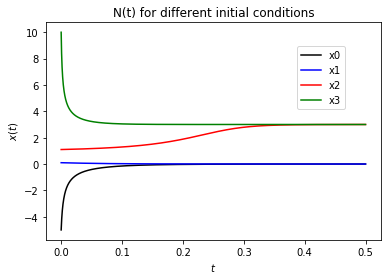

In [75]:
ode_solver(f,-5)
ode_solver1(f,0.1)
ode_solver2(f,1.1)
ode_solver3(f,10)

**Part d**

So from the plot in Part c, we can notice that solutions that start very close to the unstable fixed point $N_{\ast}=1$, if they are greater than $1$, then they tend aympotically towards the stable fixed point $N_{\ast}=3$, whereas if they are less than $1$, but still positive, they tend asymptotically towards the stable fixed point $N_{\ast}=0$. Solution that are less than $0$ (even though they do not make much sense to begin with, but we include them for the sake of our analysis), tends asymptotically towards zero. Whereas solution that are greater than $3$, tend asymptotically towards it.

**Non-dimensionalization**

Now, using

$$
N = N_{s}\tilde{N}, ~ \tau = \frac{t}{t_{s}},
$$

we try to derive a non-dimensionalization for the equation to remove as many parameters as possible.

Thus from

$$
\frac{dN}{dt}=rN-aN(N-b)^{2}
$$

we derive

$$
\frac{N_{s}}{t_{s}}\frac{d\tilde{N}}{dt}=rN_{s}\tilde{N}-aN_{s}\tilde{N}(N_{s}\tilde{N}-b)^{2}\longrightarrow\frac{d\tilde{N}}{dt}=rt_{s}\tilde{N}-at_{s}\tilde{N}(N_{s}\tilde{N}-b)^{2}
$$

After calculations we have

$$
\frac{d\tilde{N}}{dt} = rt_{s}\tilde{N}-at_{s}N_{s}^2\tilde{N}^{3}-ab^{2}t_{s}\tilde{N}+2abt_{s}N_{2}\tilde{N}^{2}
$$

Thus, now we let

$rt_{s}=1 \longrightarrow t_{s}=1/r$,

then
$$
aN_{s}^{2}=r \longrightarrow a=\frac{r}{\tilde{N_{s}^{2}}}\longrightarrow N_{s}=\pm\sqrt{\frac{r}{a}}.
$$

Now, we would like to make $b=N_{s}$, but that would imply $a=r/b^{2}$ and thus $r=ab^{2}$, which is impossible, because, in Part a, we imposed the constraint $r<ab^{2}$ in order to have a positive value for the unstable fixed point, as negative populations do not make sense. Therefore, our ODE becomes

$$
\frac{d\tilde{N}}{dt}=\tilde{N}-\tilde{N}^{3}-b^{2}\tilde{N}+2b\tilde{N}^2,
$$

which we can re-write as

$$
\frac{d\tilde{N}}{dt} = \tilde{N}(1-b^{2})+\tilde{N}^{2}(2b-\tilde{N})
$$

Now, we see that the characteristic time scale is

$$
t_{s}=1/r,
$$

which suggests that the parameter $r$ is likely to represent the growth rate of the population $N(t)$, as the characteristic time scale is inversely proportional to it. Also, we have

$$
N_{s}=\pm\sqrt{\frac{r}{a}},
$$

so we see that the characteristic population is the same as the two positive fixed points minus the parameter $b$. So this indicates that the parameter $b$ might be the parameter at which bifurcation occurs.

#### Problem 4) (4pts) 2.4.1, 2.4.4

**Solution to 2.4.1**

We have

$$
\dot x = x(x-1) = f(x).
$$

The fixed points are readily found

$$
x = x(x-1) = 0 \longrightarrow x_{\ast}=0, ~ x_{\ast}=1.
$$

For their stability

$$
f^{\prime}(x) = 1-2x \longrightarrow f^{\prime}(0) = 1, ~ f^{\prime}(1) = -1.
$$

Therefore

$$
x_{\ast}=0
$$

is an unstable fixed point, while

$$
x_{\ast}=1
$$

is a stable fixed point.

**Solution to 2.4.4**

We have

$$
\dot x = x^{2}(6-x) = f(x).
$$

The fixed points are

$$
x_{\ast}=0, ~ x_{\ast}=6.
$$

To investigate their stability we take the evaluate the derivative of $f$ at those points.

So

$$
f^{\prime}(x)= 12x-3x^{2} \longrightarrow f^{\prime}(0)=0, ~ f^{\prime}(6)=-36.
$$

Thus we see that $x_{\ast}=6$ is a stable fixed point, but nothing can be inferred on the nature of $x_{\ast}=0$ analytically, therefore we have to use graphical method. We do a phase portrait to observe the stability of both points.

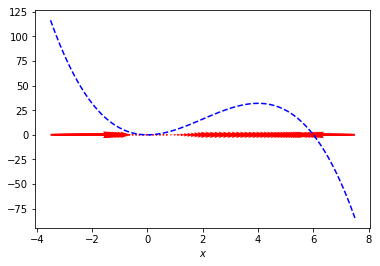

In [46]:
xvals = np.linspace(-3.5,7.5,90)
yvals = np.zeros(xvals.size)
xprime = xvals**2*(6-xvals)
yprime = np.zeros(xvals.size)
plt.plot(xvals,xvals**2*(6-xvals),ls='--',color='b')
plt.quiver(xvals,yvals,xprime,yprime,color='r')
plt.xlabel('$x$');

As expected from our analysis, the graphical approach confirms that $x_{\ast}=6$ is a stable fixed point. As for $x_{\ast}=0$ we see that $\dot x$ is positive both to its left and to its right, therefore, if we had to follow Strogatz's jargon, we would call it an half-stable fixed point. However, since it makes little sense to have a point lying in a limbo of non-definitions as the one above, we prefer to simply call it an unstable fixed point, with all due respect to Dr. Strogatz, of course.

Problem 5) (5pts) 2.4.8

**Solution**

The Gompertz model of tumor growth is given by

$$
\dot N = -aN\ln(bN) = f(N),
$$

where $N$ is proportional to the number of cells in the tumor and $a$ and $b$ are both positive parameters.

To find the fixed points, we solve

$$
-aN\ln(bN),
$$

which yields

$$
N_{\ast}=0, ~ N_{\ast}= \frac{1}{b}.
$$

To classify their stability, we could evaluate the derivative of $f(N)$ at those points, but, since the function $\ln(x)$ is not defined at zero, it would make no sense to proceed in such direction.

So, let us notice that, since $-aN>0$ for any phisically meaningful value of $N$ ($a$ is a positive parameter and negative cells do not make sense), then $\dot N > 0$ when $\ln(bN) < 0$, which holds for $0<N<\frac{1}{b}$.

Therefore, this implies that $\dot N < 0$ for $N>\frac{1}{b}$. We are not concerned to what happens for negative values of $N$ as the function is not defined there.

So we can conclude that (positive, i.e. to its right) solutions near $N_{\ast}=0$ are pushed away from it, while solutions close to $N_{\ast}= \frac{1}{b}$, both to its left and right, are attracted by it.
Thus, we can classify $N_{\ast}=0$ as an unstable fixed point, while $N_{\ast}= \frac{1}{b}$ as a stable fixed point.

Using two positive values of the parameters $a$ and $b$ we can plot our results

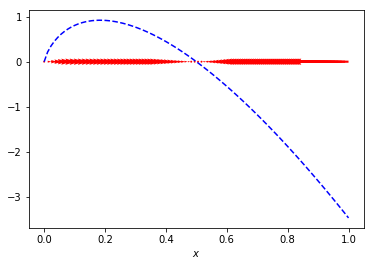

In [45]:
a=5
b=2
xvals = np.linspace(1e-7,1,90)
yvals = np.zeros(xvals.size)
xprime = -a*xvals*np.log(b*xvals)
yprime = np.zeros(xvals.size)
plt.plot(xvals,-a*xvals*np.log(b*xvals),ls='--',color='b')
plt.quiver(xvals,yvals,xprime,yprime,color='r')
plt.xlabel('$x$');